### Introduction

Climate change is one of the biggest problems the world is facing currently. Machine learning techniques can help us spot or predict trends that can help reduce climate change which is why we are investigating this dataset.

The following people collaborated on this project:
* Christopher Lammers
* Bhargev Parekh
* Mariyam Muhammad Alim

Bhargev performed the pre-processing of the data and the exploratory data analysis. Christopher and Mariyam performed the overall analysis of the data.

### Description of the data

**Source:** https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/2d1eed81-85bd-43b8-bfbe-1b5d80ff64b7

This dataset contains records of CO2 emission in Canada generated by different types of vehicles.

#### How the data was collected?

The following link has information on how the data was collected.

https://www.nrcan.gc.ca/energy-efficiency/transportation-alternative-fuels/fuel-consumption-guide/understanding-fuel-consumption-ratings/fuel-consumption-testing/21008

#### **Data Attributes**

*   **Make**: Company of the vehicle
*   **Model Year**: Vehicle model year
*   **Model**: Car model
*   **Vehicle Class**: Class of vehicle depending on their utility, capacity and weight
*   **Engine Size (L)**: Size of engine used in Litre
*   **Cylinders**: Number of cylinders
*   **Transmission**: Transmission type with number of gears
*   **Fuel Type**: Type of Fuel used
*   **Fuel Consumption City**: Fuel consumption in city roads (L/100 km)
*   **HWY fuel consumption**: Fuel consumption in highways (L/100 km)
*   **COMB (L/100 km)**:The combined fuel consumption (55% city, 45% highway) is shown in L/100 km
*   **COMB (mpg)**: The combined fuel consumption (55% city, 45% highway) is shown in Miles/Gallon
*   **CO2 Emission**: CO2 emission in g/km

#### **Models**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* CNG = Compressed natural gas
* FFV = Flexible-fuel vehicle
* NGV = Natural gas vehicle

#### **Transmission**

*   A = automatic
*   AM = automated manual
*   AS = automatic with select shift
*   AV = continuously variable
*   M = manual
*   3 - 10 = Number of gears

#### **Fuel Type**

*   X = regular gasoline
*   Z = premium gasoline
*   D = diesel
*   E = ethanol (E85)
*   N = natural gas


### Analysis of Data

In [1]:
# importing used libraries

import csv
import re
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


# this function reads the CSV file and returns the data in a Python dictionary

def get_data_csv():
    collection = []
    with open('CO2 Emission.csv', 'r') as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection
        
# the data

data = get_data_csv()

#### Getting to know the data

In [2]:
# Number of data records we have

print('Dataset has', len(data), 'records')

Dataset has 14253 records


In [3]:
# Printing first 5 records

print(data[0:5])

[OrderedDict([('Model Year', '2000'), ('Make', 'ACURA'), ('Model', '1.6EL'), ('Vehicle Class', 'COMPACT'), ('Engine Size (L)', '1.6'), ('Cylinders', '4'), ('Transmission', 'A4'), ('Fuel Type', 'X'), ('Fuel Consumption City (L/100 km)', '9.2'), ('HWY (L/100 km)', '6.7'), ('COMB (L/100 km)', '8.1'), ('COMB (mpg)', '35'), ('CO2 Emission  (g/km)', '186')]), OrderedDict([('Model Year', '2000'), ('Make', 'ACURA'), ('Model', '1.6EL'), ('Vehicle Class', 'COMPACT'), ('Engine Size (L)', '1.6'), ('Cylinders', '4'), ('Transmission', 'M5'), ('Fuel Type', 'X'), ('Fuel Consumption City (L/100 km)', '8.5'), ('HWY (L/100 km)', '6.5'), ('COMB (L/100 km)', '7.6'), ('COMB (mpg)', '37'), ('CO2 Emission  (g/km)', '175')]), OrderedDict([('Model Year', '2000'), ('Make', 'ACURA'), ('Model', '3.2TL'), ('Vehicle Class', 'MID-SIZE'), ('Engine Size (L)', '3.2'), ('Cylinders', '6'), ('Transmission', 'AS5'), ('Fuel Type', 'Z'), ('Fuel Consumption City (L/100 km)', '12.2'), ('HWY (L/100 km)', '7.4'), ('COMB (L/100 km

In [4]:
# Finding out whether car company names are unique

MKnames= list(map(lambda n: n['Make'], data))

unique = len(set(MKnames)) == len(MKnames)
print(unique)

if (unique == False):
    print("Car maker names are not unique")

print(len(set(MKnames)), " out of ", len(MKnames) , " maker have unique names")

False
Car maker names are not unique
51  out of  14253  maker have unique names


In [5]:
# Finding the range of CO2 emission

CO2List = list(map(lambda n: int(n['CO2 Emission  (g/km)']), data))

print('CO2 emissions range from',str(min(CO2List)) +'(g/km)', 'to', str(max(CO2List))+'(g/km)')

CO2 emissions range from 83(g/km) to 570(g/km)


In [6]:
# What are the different fuel types?

fuelTypeList = list(map(lambda n: n['Fuel Type'], data))
UniqueFuel = set(fuelTypeList)

print('There are', len(UniqueFuel), 'types of fuels, whch includes',UniqueFuel)

There are 5 types of fuels, whch includes {'Z', 'E', 'D', 'X', 'N'}


In [7]:
# What are the different sizes of cylinders?

CyList = list(map(lambda n:n['Cylinders'], data))
CyListUnique = set(CyList)
print('There are',len(CyListUnique),'Sizes of cylinders, which includes', CyListUnique)

There are 9 Sizes of cylinders, which includes {'10', '6', '8', '16', '3', '4', '2', '5', '12'}


In [8]:
# What are the different sizes of transmissions in vehicle?

TranList = list(map(lambda n:n['Transmission'], data))
TranUnique = set(TranList)
print('There are',len(TranUnique),'Sizes of cylinders, which includes', TranUnique)

There are 24 Sizes of cylinders, which includes {'A7', 'A6', 'A3', 'AV', 'AM6', 'A9', 'AS8', 'A5', 'AS9', 'AM5', 'M6', 'AV7', 'AM7', 'AS6', 'M7', 'AS7', 'M5', 'AV6', 'AV8', 'AS5', 'M4', 'A8', 'AS4', 'A4'}


#### Preliminary Data Processing

In [9]:
# Converting data into Dataframe

df = pd.DataFrame(data)

In [10]:
# Checking for null values

df.isnull().sum()

Model Year                          0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size (L)                     0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
HWY (L/100 km)                      0
COMB (L/100 km)                     0
COMB (mpg)                          0
CO2 Emission  (g/km)                0
dtype: int64

In [11]:
# Checking data types

df.dtypes

Model Year                          object
Make                                object
Model                               object
Vehicle Class                       object
Engine Size (L)                     object
Cylinders                           object
Transmission                        object
Fuel Type                           object
Fuel Consumption City (L/100 km)    object
HWY (L/100 km)                      object
COMB (L/100 km)                     object
COMB (mpg)                          object
CO2 Emission  (g/km)                object
dtype: object

In [12]:
# Changing fuel type values

df['Fuel Type'].replace({"X": "Regular gas", "Z": "Premium gas", "D": "Diesel", "E": "ethanol", "N": "Natural Gas"}, inplace=True)
df['Fuel Type']

0        Regular gas
1        Regular gas
2        Premium gas
3        Premium gas
4        Regular gas
            ...     
14248    Regular gas
14249    Regular gas
14250    Regular gas
14251    Regular gas
14252    Regular gas
Name: Fuel Type, Length: 14253, dtype: object

In [13]:
# Converting object type to required types

df['Model Year'] = df['Model Year'].astype(int)
df['Make'] = df['Make'].astype(str)
df['Model'] = df['Model'].astype(str)
df['Vehicle Class'] = df['Vehicle Class'].astype(str)
df['Engine Size (L)'] = df['Engine Size (L)'].astype(float)
df['Cylinders'] = df['Cylinders'].astype(int)
df['Transmission'] = df['Transmission'].astype(str)
df['Fuel Type'] = df['Fuel Type'].astype(str)
df['Fuel Consumption City (L/100 km)'] = df['Fuel Consumption City (L/100 km)'].astype(float)
df['HWY (L/100 km)'] = df['HWY (L/100 km)'].astype(float)
df['COMB (L/100 km)'] = df['COMB (L/100 km)'].astype(float)
df['COMB (mpg)'] = df['COMB (mpg)'].astype(int)
df['CO2 Emission  (g/km)'] = df['CO2 Emission  (g/km)'].astype(int)

# Number of duplicate rows
print('Number of duplicates: ', df.duplicated().sum())
print(df.dtypes)

Number of duplicates:  1
Model Year                            int64
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size (L)                     float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
HWY (L/100 km)                      float64
COMB (L/100 km)                     float64
COMB (mpg)                            int64
CO2 Emission  (g/km)                  int64
dtype: object


In [14]:
# Removing duplicate rows

df = df.dropna()

In [15]:
# Renaming some column names

df = df.rename(columns={"Engine Size (L)": "Engine Size", "Fuel Consumption City (L/100 km)": "City", "HWY (L/100 km)": "HWY", "COMB (L/100 km)": "COMB", "CO2 Emission  (g/km)": "CO2 Emission"})

### Exploratory Data Analysis

In [16]:
# What was the average CO2 emission per car manufacturer (make)?

CO2_Make = round(df.groupby(['Make'])['CO2 Emission'].mean().sort_values().reset_index(),2)
CO2_Make

,Make,CO2 Emission
0,SMART,121.35
1,FIAT,149.50
2,MINI,162.28
3,SCION,170.74
4,ALFA ROMEO,177.00
5,HONDA,193.63
6,DAEWOO,204.00
7,SUZUKI,204.59
8,HYUNDAI,204.68
9,KIA,205.66


In [17]:
# What were the top three car manufacturers that emitted the MOST CO2?

CO2_Make.sort_values(by=['CO2 Emission'], ascending=False).head(3)

,Make,CO2 Emission
50,BUGATTI,496.00
49,FERRARI,411.00
48,BENTLEY,392.03


In [18]:
# What were the top three car manufacturers that emitted the LEAST CO2?

CO2_Make.sort_values(by=['CO2 Emission'], ascending = True).head(3)

,Make,CO2 Emission
0,SMART,121.35
1,FIAT,149.50
2,MINI,162.28


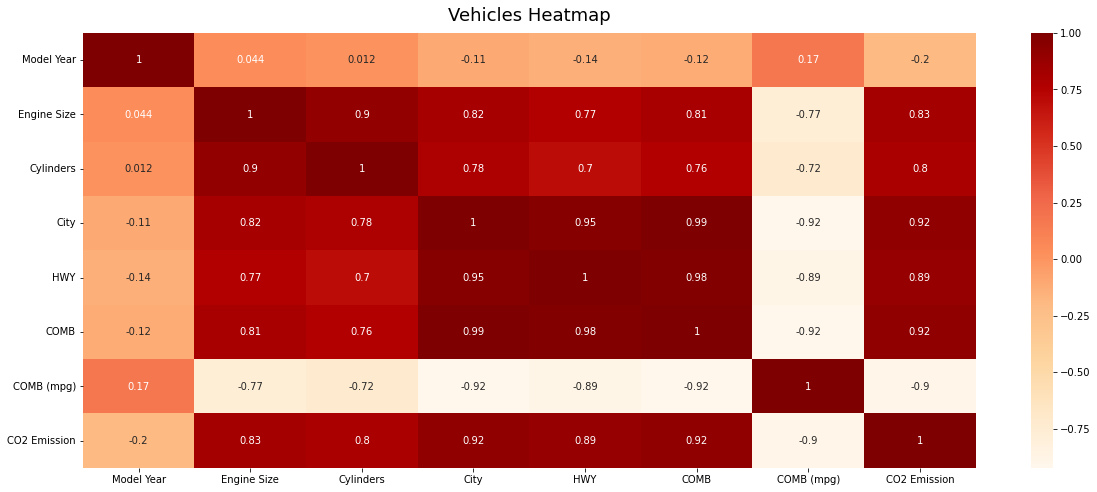

Figure 1


In [19]:
# Finding the correlation coefficients between columns

plt.figure(figsize = (20,8))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True , cmap='OrRd')
heatmap.set_title('Vehicles Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()
print("Figure 1")

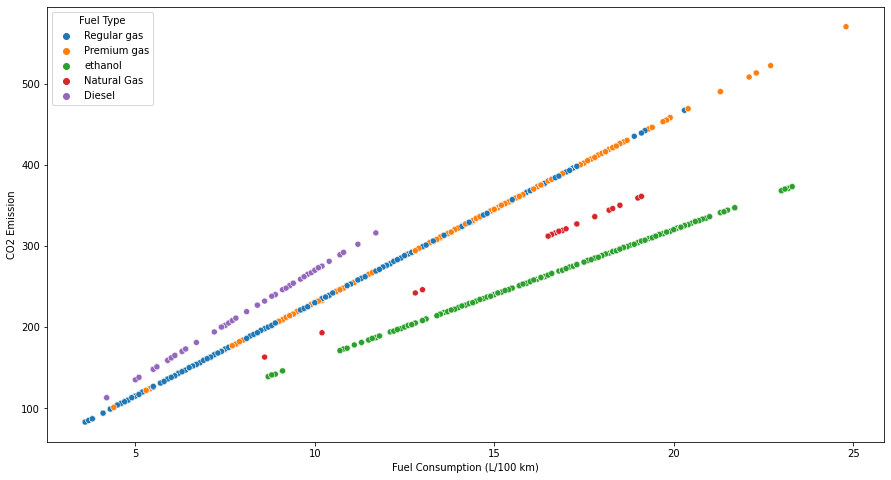

Figure 2


In [20]:
# Correlation between fuel consumption and C02 emission

plt.figure(figsize = (15, 8))
sns.scatterplot(y = 'CO2 Emission', x = 'COMB', data = df, hue ='Fuel Type')
plt.xlabel("Fuel Consumption (L/100 km)")
plt.show()
print("Figure 2")


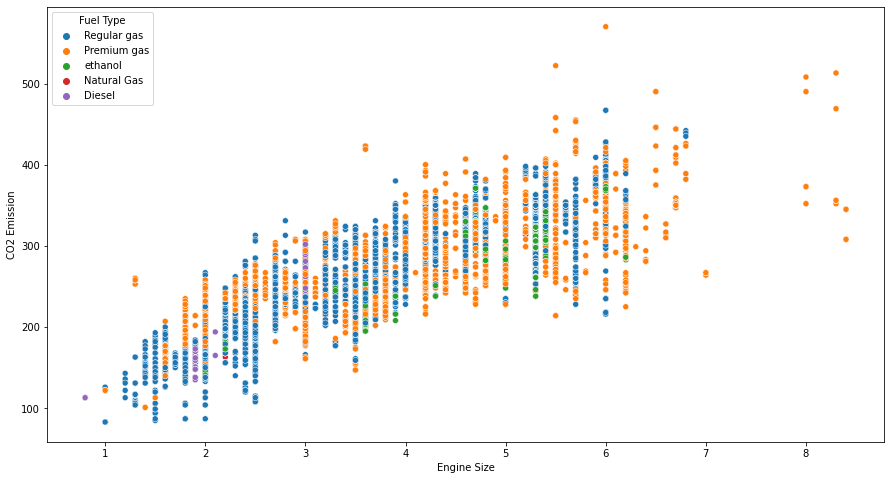

Figure 3


In [21]:
# Correlation between engine size and CO2 emissions

plt.figure(figsize = (15, 8))
sns.scatterplot(y = 'CO2 Emission', x = 'Engine Size', data = df, hue ='Fuel Type')
plt.show()
print("Figure 3")

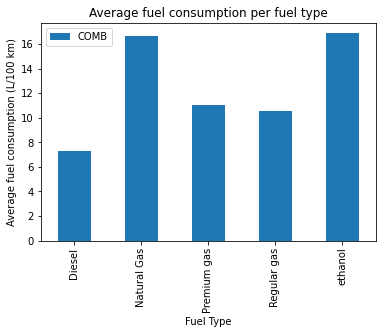

Figure 4


In [22]:
# Fuel types used in Highways and City

fuel_Comb = df.groupby(by = 'Fuel Type')[['COMB']].mean()
fuel_Comb.plot.bar()
plt.title("Average fuel consumption per fuel type")
plt.ylabel("Average fuel consumption (L/100 km)")
plt.xlabel("Fuel Type")


plt.show()
print("Figure 4")

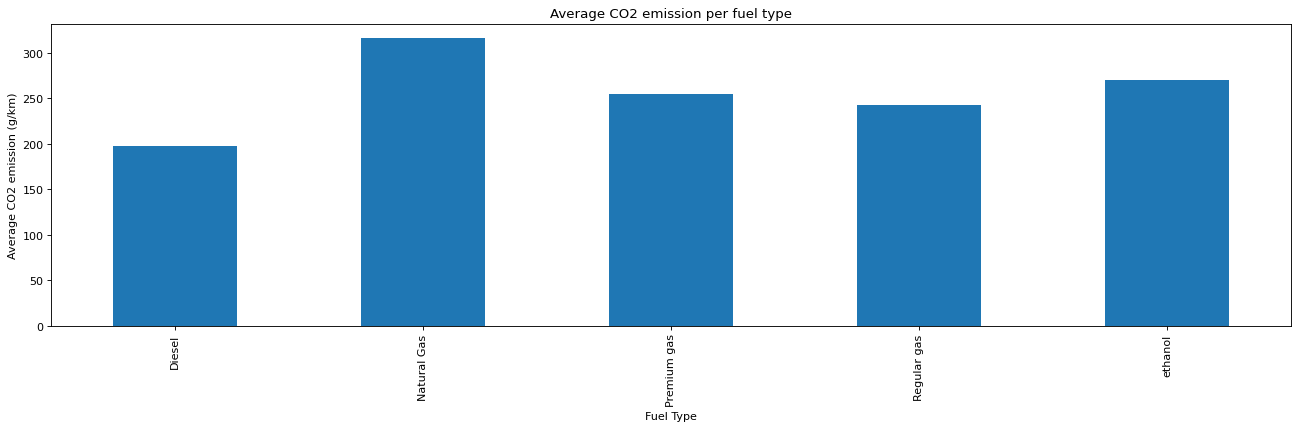

Figure 5


In [23]:
# Average CO2 emission per fuel type

figure(figsize=(20, 5), dpi=80)

CO2_FuelType = df.groupby(['Fuel Type'])['CO2 Emission'].mean()
CO2_FuelType.plot.bar()
plt.title("Average CO2 emission per fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("Average CO2 emission (g/km)")
plt.show()
print("Figure 5")

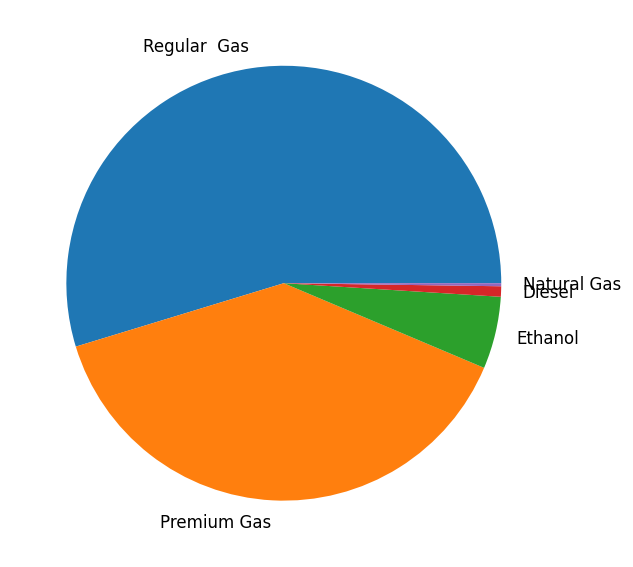

Figure 6


In [28]:
# Displaying the distribution of fuel types used by vehicles between the years 2000 and 2014

distr = df['Fuel Type'].value_counts()
figure(figsize=(50, 6), dpi=120)
mylabels = ["Regular  Gas", "Premium Gas", "Ethanol", "Diesel", "Natural Gas"]
plt.pie(distr,  labels = mylabels)

plt.show()
print("Figure 6")

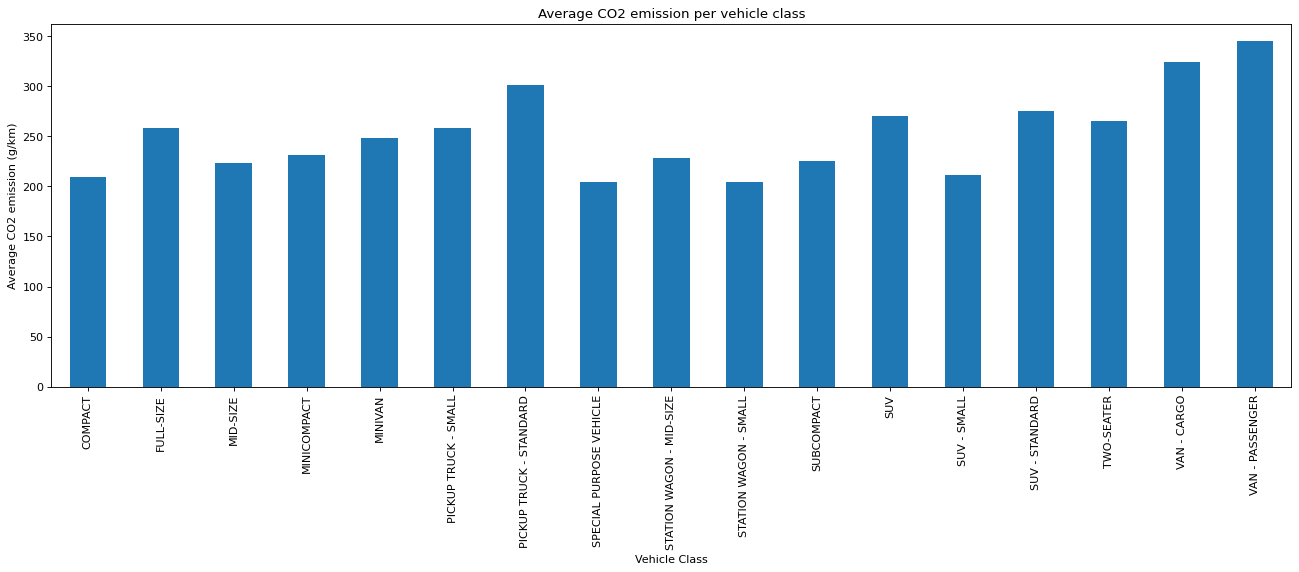

Figure 7


In [25]:
# What was the average CO2 emission per vehicle class?
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
CO2_Vclass = df.groupby(['Vehicle Class'])['CO2 Emission'].mean()
CO2_Vclass.plot.bar()
plt.title("Average CO2 emission per vehicle class")
plt.ylabel("Average CO2 emission (g/km)")
plt.xlabel("Vehicle Class")
plt.show()
print("Figure 7")

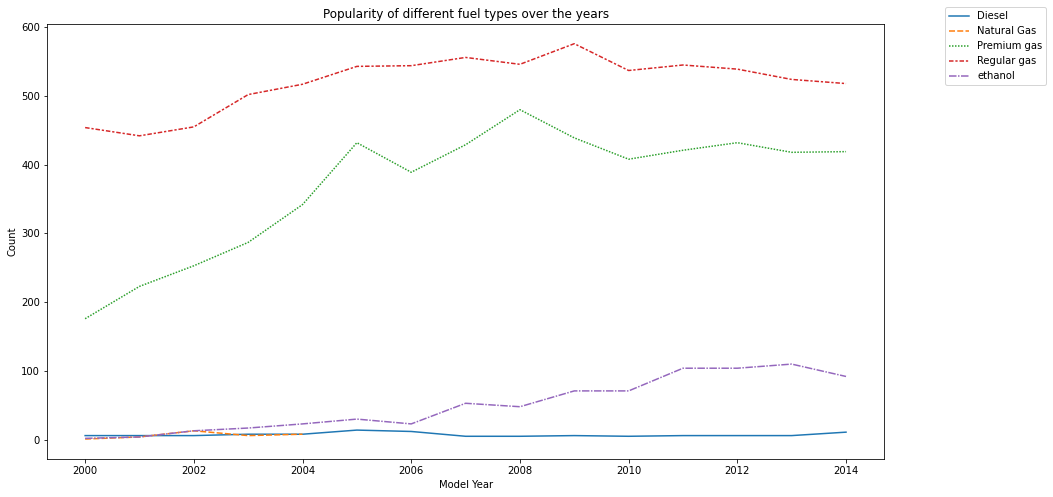

Figure 8


In [26]:
# Displaying the popularity of different fuel types between 2000 and 2014

df_pivot = pd.pivot_table(df, values='CO2 Emission', index=['Model Year'],columns=['Fuel Type'], aggfunc={'CO2 Emission': 'count'})
plt.figure(figsize = (15, 8))

sns.lineplot(data=df_pivot)

plt.title("Popularity of different fuel types over the years")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.2, 1.05))
plt.show()
print("Figure 8")

Figure 9


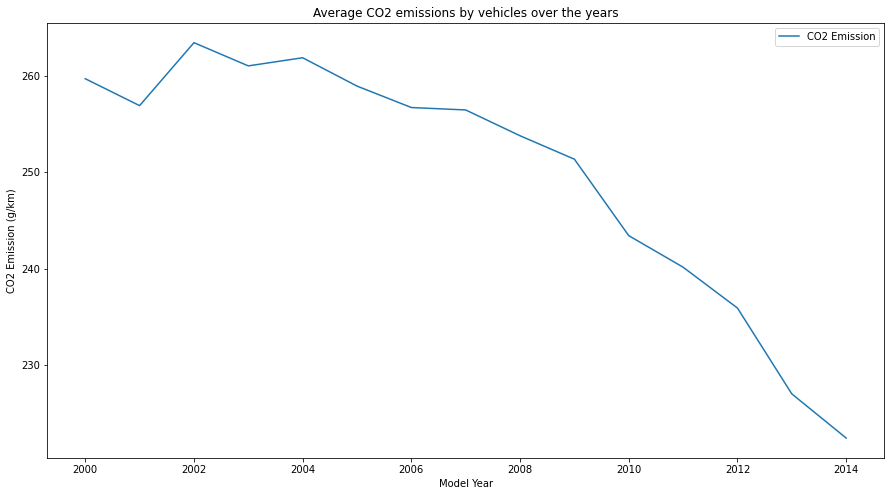

In [27]:
# Displaying the CO2 emissions by vehicles between the years 2000 and 2014

df_pivot2 = pd.pivot_table(df, values = 'CO2 Emission', index = ['Model Year'], aggfunc = {'CO2 Emission':'mean'})
plt.figure(figsize = (15, 8))
sns.lineplot(data=df_pivot2)
plt.xlabel("Model Year")
plt.ylabel("CO2 Emission (g/km)")
plt.title("Average CO2 emissions by vehicles over the years")
#plt.show()
print("Figure 9")

### Potential Data Science Applications

- We could predict the trend of average CO2 emissions by vehicles over the next few years using machine learning.
- We could calculate the carbon footprint for different car manufacturers and  use that information to calculate their carbon tax. The carbon footprint rating could also be calculated for each model of vehicle. People could look at carbon footprints of different car manufacturers or the carbon footprint rating of different vehicles to decide what vehicle to purchase.
- Currently, drivers are not aware of how much CO2 their vehicles emit. We could reprogram cars to track the amount of CO2 being generated. Car owners can then view the amount of CO2 that was generated over a span of days or months. This will help vehicle owners rethink their life choices.

### Conclusion

Some of the interesting findings:
- Diesel is the most efficent fuel type but is not used as much as preimum and regular gasoline.
- The average CO2 emission by vehicles made in 2000 is a lot more than by vehicles made in 2014.

The author of this dataset compiled it using data from 7 years ago. Some of the results that were generated in this report are probably not relevant anymore. The vehicles that were listed in this dataset may not be in production anymore or people may be using newer or more energy-efficient models of those vehicles.

If we were ever to further research on this dataset, we could use the information we have on their fuel consumption, the amount of CO2 they emit and the features they have to calculate their efficiency. We could also calculate the fuel consumption rating for each vehicle.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d951d9b9-3b0d-42c0-8918-4e58efe0c009' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>